# Factor Analysis
**文章说明：**
- 这文章为Avinash Navlani在datacamp写的关于[FA的入门介绍](https://www.datacamp.com/tutorial/introduction-factor-analysis)
- 这里使用了[factor_analyzer库用于FA分析](https://github.com/EducationalTestingService/factor_analyzer)

In [26]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

## 导入数据
- 这是关于人格的数据集
- 数据集介绍: https://vincentarelbundock.github.io/Rdatasets/doc/psych/bfi.html
- 数据集下载: https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [27]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv")
# df= pd.read_csv("bfi.csv")

数据说明：
- 这是从国际人格项目库（ipip.ori.org）中提取的25个人格项目报告
- 其中包含来自 2800 个受试者的数据，用于规模构建、因子分析和项目响应理论分析的演示集
- 其中还包括三个额外的人口统计变量（性别，教育和年龄）

数据所包含的 28 个问题：
- A1 我对别人的感受漠不关心。（q_146）
- A2 询问他人的幸福感。（q_1162）
- A3 知道如何安慰别人。（q_1206）
- A4 爱孩子。（q_1364）
- A5 让人们感到安心。（q_1419）
- C1 我的工作非常严格。（q_124）
- ...

```{tip}
剔除人口统计变量（性别，教育和年龄）这个3个变量特征，前25个变量特征实际上是由五个隐性变量（latent variables）组成：**亲和力，尽责性，外向性，神经质和开放性**。

- c(“-A1”,“A2”,“A3”,“A4”,“A5”) => 亲和力
- c(“C1”,“C2”,“C3”,“-C4”,“-C5”) => 尽责性
- c(“-E1”,“-E2”,“E3”,“E4”,“E5”) => 外向性
- c(“N1”,“N2”,“N3”,“N4”,“N5”) => 神经质
- c(“O1”,“-O2”,“O3”,“O4”,“-O5”) => 开放性
```

In [28]:
# 剔除不必要的人口统计变量特征（性别，教育和年龄）
df.drop(['Unnamed: 0', 'gender', 'education', 'age'],axis=1,inplace=True)

In [29]:
# 去除缺失数据
df.dropna(inplace=True)

In [30]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [31]:
df.shape

(2436, 25)

## 充分性测试(Adequacy Test)

在做因子分析之前, 我们需要先做充分性检测, 判断数据集中是否存在因子（factor）：
- `Bartlett's Test`: 是用来检测已知（可观察）变量之间是否关联, 如果检测结果在统计学上不显著, 就不能采用因子分析
- `Kaiser-Meyer-Olkin(KMO) Test`: 检测数据对因子分析的适用性。KMO 值的范围介于 0 和 1 之间。 KMO 值需要大于 0.6 才视为适用

In [32]:
# Bartlett's Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.966350868897, 0.0)

**说明**：p_value=0, 表明数据变量间具有显著的关联性. `p_value需要少于0.5`

In [33]:
# Kaiser-Meyer-Olkin(KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print(kmo_model)

0.8485397221949232


**说明**： KMO 值大于 0.6 ，符合因子分析的适用性

## 选择因子个数

In [34]:
# 数据集中共有25个变量，我们需要考虑究竟需要归集为多少个因子是最合适的
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df)
# 查看特征值
ev, v = fa.get_eigenvalues()

In [35]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

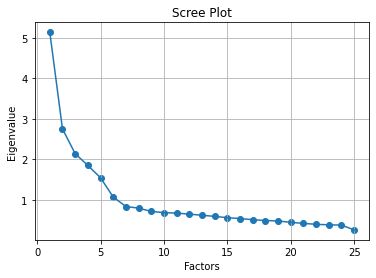

In [36]:
# 可视化
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

如图，这里显示有 6 个因子的特征值是大于 1。这意味着我们只需要选择6个因子（或未观察到的变量）。

## 因子分析（Factor Analysis）

In [66]:
fa = FactorAnalyzer(6, rotation="varimax")
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [67]:
# 25*6(变量个数*因子个数)
fa.loadings_

array([[ 9.52197423e-02,  4.07831574e-02,  4.87338846e-02,
        -5.30987347e-01, -1.13057329e-01,  1.61216352e-01],
       [ 3.31312760e-02,  2.35538039e-01,  1.33714395e-01,
         6.61140975e-01,  6.37337873e-02, -6.24353669e-03],
       [-9.62088402e-03,  3.43008172e-01,  1.21353367e-01,
         6.05932695e-01,  3.39902654e-02,  1.60106427e-01],
       [-8.15175585e-02,  2.19716720e-01,  2.35139532e-01,
         4.04594040e-01, -1.25338019e-01,  8.63557029e-02],
       [-1.49615885e-01,  4.14457673e-01,  1.06382165e-01,
         4.69698292e-01,  3.09765725e-02,  2.36519343e-01],
       [-4.35840210e-03,  7.72477520e-02,  5.54582255e-01,
         7.51069609e-03,  1.90123729e-01,  9.50350471e-02],
       [ 6.83300836e-02,  3.83703837e-02,  6.74545448e-01,
         5.70549881e-02,  8.75925913e-02,  1.52775079e-01],
       [-3.99936734e-02,  3.18673004e-02,  5.51164438e-01,
         1.01282241e-01, -1.13380869e-02,  8.99628374e-03],
       [ 2.16283366e-01, -6.62407741e-02, -6.384

Text(0.5, 1.0, 'Factor Analysis')

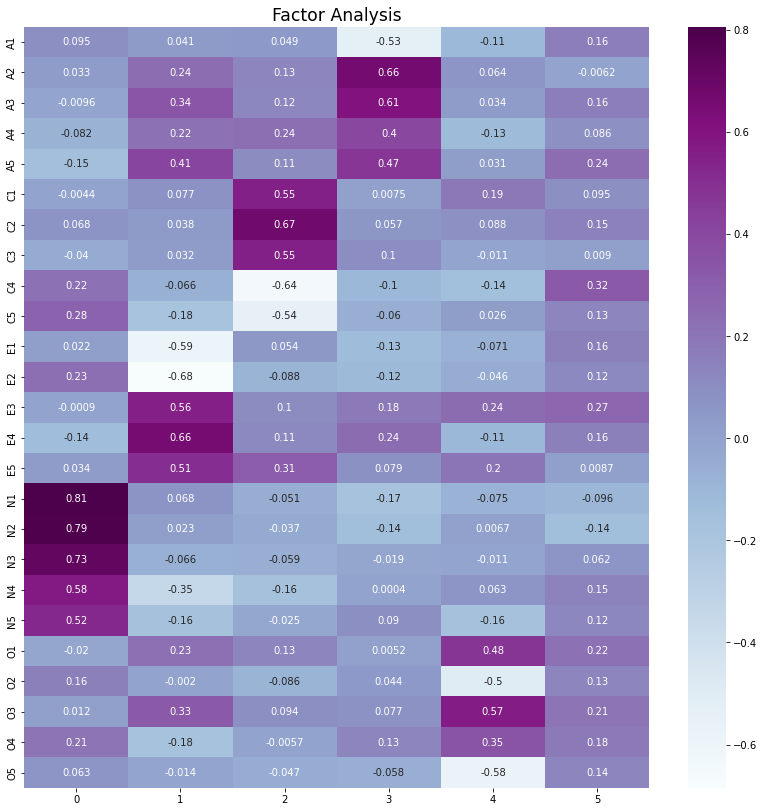

In [68]:
# 可视化
import seaborn as sns

df_cm = pd.DataFrame(fa.loadings_, index=df.columns)

plt.figure(figsize = (14,14))
sns.heatmap(df_cm, annot=True, cmap="BuPu")
ax.tick_params(axis='x',labelsize=15)
ax.yaxis.set_tick_params(labelsize=15) 
plt.title('Factor Analysis', fontsize='xx-large')

**说明：**
- 每一个变量都可以由6个隐变量所表示
- **A1 = 0.0095*F1 + 0.041*F2 + 0.049*F3 + -0.53*F4 + -0.11*F5 + 0.16*F6**
- **A2 = 0.033*F1 + 0.24*F2 + 0.13*F3 + 0.66*F4 + 0.064*F5 + -0.0062*F6**

In [70]:
# 累计贡献率
pd.DataFrame(fa.get_factor_variance(),index=['variance','proportional_variance','cumulative_variances'], columns=[f"factor{x}" for x in range(1,7)])

,factor1,factor2,factor3,factor4,factor5,factor6
variance,2.726989,2.602239,2.073471,1.713499,1.504831,0.630297
proportional_variance,0.109080,0.104090,0.082939,0.068540,0.060193,0.025212
cumulative_variances,0.109080,0.213169,0.296108,0.364648,0.424841,0.450053


**说明：** `6 个因子可以解释累积 45% 方差`